# Import library & Read dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('steam.csv')

In [3]:
df.head()

,Steam id,Game,Current players,Peak players today,Release date,Review summary,Total reviews,Tags
0,730,Counter-Strike: Global Offensive,736875,775266,21 Aug 2012,Very Positive,5993058.0,FPS:Shooter:Multiplayer:Competitive:Action:Tea...
1,570,Dota 2,580933,649690,9 Jul 2013,Very Positive,1599180.0,Free to Play:MOBA:Multiplayer:Strategy:eSports...
2,1063730,New World,243815,307146,28 Sep 2021,Mostly Positive,145931.0,Massively Multiplayer:Open World:MMORPG:Advent...
3,1172470,Apex Legends,121313,245235,4 Nov 2020,Very Positive,338236.0,Free to Play:Battle Royale:Multiplayer:Shooter...
4,440,Team Fortress 2,104477,111884,10 Oct 2007,Very Positive,821568.0,Free to Play:Hero Shooter:Multiplayer:FPS:Shoo...


In [4]:
df.columns

Index(['Steam id', 'Game', 'Current players', 'Peak players today',
       'Release date', 'Review summary', 'Total reviews', 'Tags'],
      dtype='object')

In [5]:
df.shape

(100, 8)

# Filling null values

In [6]:
df.isnull().sum()

Steam id              0
Game                  0
Current players       0
Peak players today    0
Release date          1
Review summary        1
Total reviews         1
Tags                  2
dtype: int64

In [7]:
#filling na values
df['Release date'].fillna(df['Release date'].mode()[0], inplace=True) #filled by mode
df['Review summary'].fillna(df['Review summary'].mode()[0], inplace=True) #filled by mode
df['Total reviews'].fillna(df['Total reviews'].mean(), inplace=True) #filled by mean
df['Tags'].fillna('Unknown', inplace=True) #filled by Unknown

In [8]:
df.isnull().sum()

Steam id              0
Game                  0
Current players       0
Peak players today    0
Release date          0
Review summary        0
Total reviews         0
Tags                  0
dtype: int64

# Change some columns' datatype

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Steam id            100 non-null    int64  
 1   Game                100 non-null    object 
 2   Current players     100 non-null    int64  
 3   Peak players today  100 non-null    int64  
 4   Release date        100 non-null    object 
 5   Review summary      100 non-null    object 
 6   Total reviews       100 non-null    float64
 7   Tags                100 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [10]:
#changing Release date column datatype 
df['Release date'] = pd.to_datetime(df['Release date'])

In [11]:
#changing float to int
df['Total reviews'] = df['Total reviews'].astype('int64')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Steam id            100 non-null    int64         
 1   Game                100 non-null    object        
 2   Current players     100 non-null    int64         
 3   Peak players today  100 non-null    int64         
 4   Release date        100 non-null    datetime64[ns]
 5   Review summary      100 non-null    object        
 6   Total reviews       100 non-null    int64         
 7   Tags                100 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 6.4+ KB


In [13]:
df.drop('Steam id', inplace=True, axis=1)

In [14]:
df

,Game,Current players,Peak players today,Release date,Review summary,Total reviews,Tags
0,Counter-Strike: Global Offensive,736875,775266,2012-08-21,Very Positive,5993058,FPS:Shooter:Multiplayer:Competitive:Action:Tea...
1,Dota 2,580933,649690,2013-07-09,Very Positive,1599180,Free to Play:MOBA:Multiplayer:Strategy:eSports...
2,New World,243815,307146,2021-09-28,Mostly Positive,145931,Massively Multiplayer:Open World:MMORPG:Advent...
3,Apex Legends,121313,245235,2020-11-04,Very Positive,338236,Free to Play:Battle Royale:Multiplayer:Shooter...
4,Team Fortress 2,104477,111884,2007-10-10,Very Positive,821568,Free to Play:Hero Shooter:Multiplayer:FPS:Shoo...
...,...,...,...,...,...,...,...
95,STAR WARS™: The Old Republic™,7104,9345,2020-07-21,Very Positive,33098,Free to Play:MMORPG:Character Customization:Mu...
96,NBA 2K22,7020,13139,2021-09-09,Mixed,6266,Sports:Basketball:Simulation:eSports:Realistic...
97,Assetto Corsa,6965,8707,2014-12-19,Very Positive,42497,Racing:Automobile Sim:Simulation:Driving:Reali...
98,No Man's Sky,6963,10122,2016-08-12,Mostly Positive,168792,Open World:Open World Survival Craft:Space:Exp...


# ANALYZE OF CATEGORICAL VARIABLES

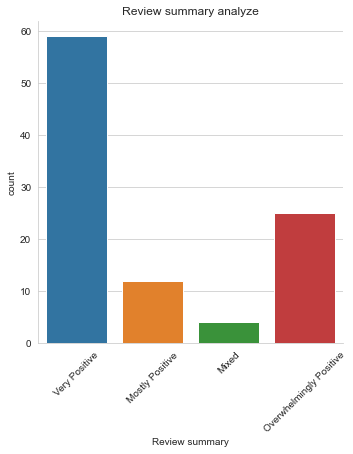

In [15]:
sns.set_style("whitegrid")
sns.catplot(x='Review summary', data=df, kind='count')
plt.xticks(rotation='45')
plt.title('Review summary analyze')
plt.show()

In [16]:
summary = df['Review summary'].value_counts()

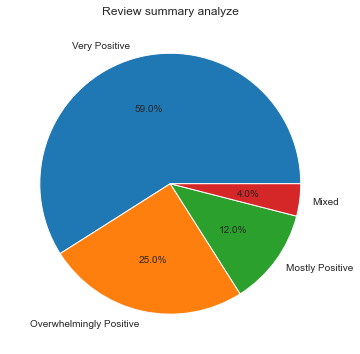

In [17]:
pie, ax = plt.subplots(figsize=(10,6))
labels = summary.index
plt.pie(x=summary, autopct="%.1f%%", labels=labels)
plt.title('Review summary analyze')
plt.show()

# ANALYZE OF NUMERIC VARIABLES

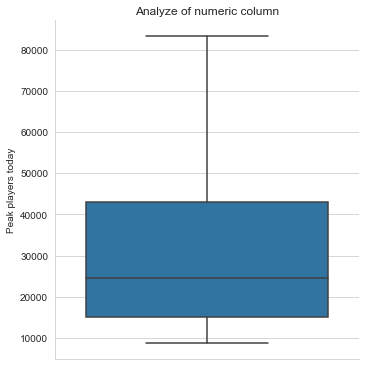

In [18]:
sns.catplot(y='Peak players today', data=df, kind='box', sym="")
plt.title('Analyze of numeric column')
plt.show()

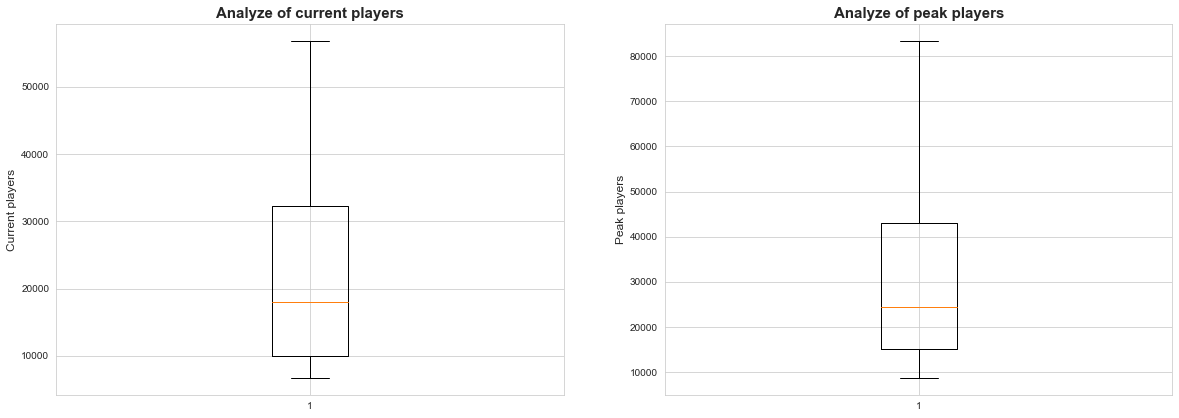

In [19]:
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(2, 2, 1)
ax1.boxplot(df['Current players'],0, '')
ax1.set_title("Analyze of current players", fontweight='bold', fontsize=15)
ax1.set_ylabel("Current players", fontsize=12)

ax2 = fig.add_subplot(2, 2, 2)
ax2.boxplot(df['Peak players today'],0, '')
ax2.set_title("Analyze of peak players", fontweight='bold', fontsize=15)
ax2.set_ylabel("Peak players", fontsize=12)

plt.show()

# Adding new columns

In [20]:
#adding new column Year which extracted from Release date column
df['Year'] = df['Release date'].dt.year.values

In [21]:
#adding new column Month which extracted from Release date column and converted to text format
df['Month'] = df['Release date'].dt.month_name().values

In [22]:
df

,Game,Current players,Peak players today,Release date,Review summary,Total reviews,Tags,Year,Month
0,Counter-Strike: Global Offensive,736875,775266,2012-08-21,Very Positive,5993058,FPS:Shooter:Multiplayer:Competitive:Action:Tea...,2012,August
1,Dota 2,580933,649690,2013-07-09,Very Positive,1599180,Free to Play:MOBA:Multiplayer:Strategy:eSports...,2013,July
2,New World,243815,307146,2021-09-28,Mostly Positive,145931,Massively Multiplayer:Open World:MMORPG:Advent...,2021,September
3,Apex Legends,121313,245235,2020-11-04,Very Positive,338236,Free to Play:Battle Royale:Multiplayer:Shooter...,2020,November
4,Team Fortress 2,104477,111884,2007-10-10,Very Positive,821568,Free to Play:Hero Shooter:Multiplayer:FPS:Shoo...,2007,October
...,...,...,...,...,...,...,...,...,...
95,STAR WARS™: The Old Republic™,7104,9345,2020-07-21,Very Positive,33098,Free to Play:MMORPG:Character Customization:Mu...,2020,July
96,NBA 2K22,7020,13139,2021-09-09,Mixed,6266,Sports:Basketball:Simulation:eSports:Realistic...,2021,September
97,Assetto Corsa,6965,8707,2014-12-19,Very Positive,42497,Racing:Automobile Sim:Simulation:Driving:Reali...,2014,December
98,No Man's Sky,6963,10122,2016-08-12,Mostly Positive,168792,Open World:Open World Survival Craft:Space:Exp...,2016,August


# ANALYZE OF DATE COLUMN

In [23]:
grouped_year = df.groupby('Year').count()['Game']

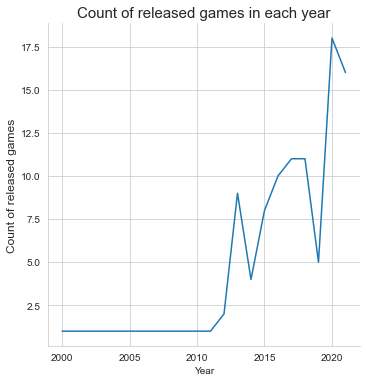

In [24]:
sns.relplot(x=grouped_year.index, y=grouped_year.values, data=grouped_year, kind='line')
plt.title('Count of released games in each year', fontsize=15)
plt.ylabel('Count of released games', fontsize=12)
plt.show()

In [25]:
grouped_month = df.groupby('Month').count()['Game']

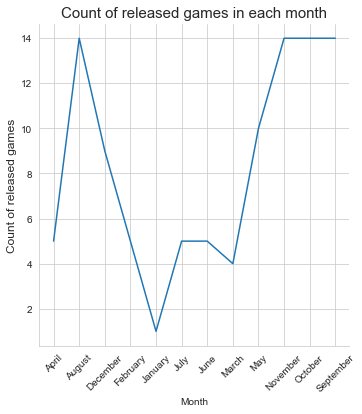

In [26]:
sns.relplot(x=grouped_month.index, y=grouped_month.values, data=grouped_month, kind='line')
plt.title('Count of released games in each month', fontsize=15)
plt.ylabel('Count of released games', fontsize=12)
plt.xticks(rotation='45')
plt.show()

# ANALYZE OF TWO VARIABLE

In [27]:
data_sorted = df.sort_values(by='Peak players today', ascending=False).head(10)

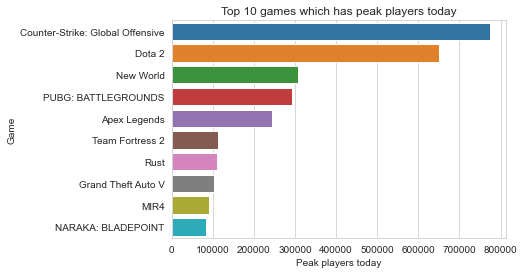

In [28]:
sns.barplot(y='Game', x='Peak players today', data=data_sorted)
plt.title('Top 10 games which has peak players today')
plt.show()

In [29]:
df['Peak-Current'] = df['Peak players today'] - df['Current players'] 

In [30]:
df.head()

,Game,Current players,Peak players today,Release date,Review summary,Total reviews,Tags,Year,Month,Peak-Current
0,Counter-Strike: Global Offensive,736875,775266,2012-08-21,Very Positive,5993058,FPS:Shooter:Multiplayer:Competitive:Action:Tea...,2012,August,38391
1,Dota 2,580933,649690,2013-07-09,Very Positive,1599180,Free to Play:MOBA:Multiplayer:Strategy:eSports...,2013,July,68757
2,New World,243815,307146,2021-09-28,Mostly Positive,145931,Massively Multiplayer:Open World:MMORPG:Advent...,2021,September,63331
3,Apex Legends,121313,245235,2020-11-04,Very Positive,338236,Free to Play:Battle Royale:Multiplayer:Shooter...,2020,November,123922
4,Team Fortress 2,104477,111884,2007-10-10,Very Positive,821568,Free to Play:Hero Shooter:Multiplayer:FPS:Shoo...,2007,October,7407


In [31]:
sorted_by_peak_current = df.sort_values(by='Peak-Current', ascending=False).head(10)

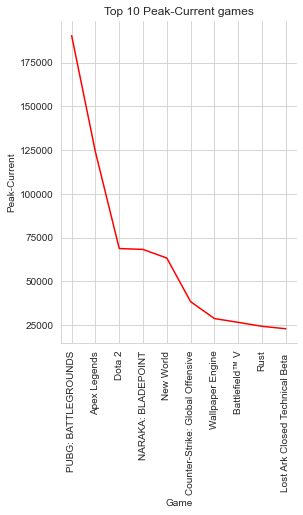

In [32]:
sns.relplot(x='Game', y='Peak-Current', data=sorted_by_peak_current, kind='line', color='r')
plt.xticks(rotation='90')
plt.title('Top 10 Peak-Current games')
plt.show()

# GROUPBY AND APPLY

I want to show in each month how many games are released in categorical. I think it will help in what month should they expect

In [33]:
average_game_per_month = int(len(df) / 12)

In [34]:
pd.DataFrame(df.groupby('Month')['Game'].count().apply(lambda x: 'more games' if x> average_game_per_month else 'less games'))

,Game
Month,
April,less games
August,more games
December,more games
February,less games
January,less games
July,less games
June,less games
March,less games
May,more games


# IMPLEMENTATION

In this task I want to show in which year in which month how many games were released by pivot table

In [35]:
df.pivot_table(values="Total reviews", index="Year", columns='Month', fill_value=0, margins=True, aggfunc='count')

Month,April,August,December,February,January,July,June,March,May,November,October,September,All
Year,,,,,,,,,,,,,
2000,0,0,0,0,0,0,0,0,0,1,0,0,1
2006,0,0,0,0,0,0,0,0,0,1,0,0,1
2007,0,0,0,0,0,0,0,0,0,0,1,0,1
2009,0,0,0,0,0,0,0,0,0,1,0,0,1
2010,0,0,0,0,0,0,0,0,0,0,0,1,1
2011,0,0,0,0,0,0,0,0,1,0,0,0,1
2012,0,1,0,0,0,0,0,0,0,0,1,0,2
2013,0,4,1,0,0,1,0,1,0,0,1,1,9
2014,0,0,2,1,0,0,0,0,0,1,0,0,4
